#Seaborn

In [33]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###With regular matplotlib

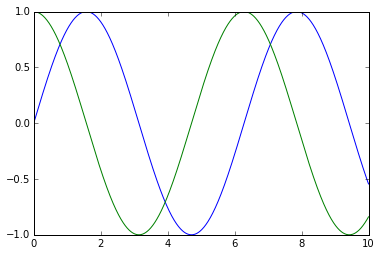

In [34]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

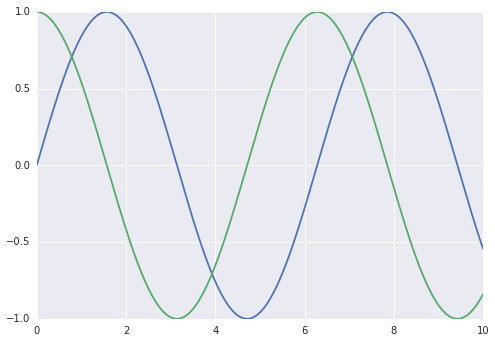

In [35]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x));

### Histogram, KDEs, and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Seaborn provides simple tools to make this happen:

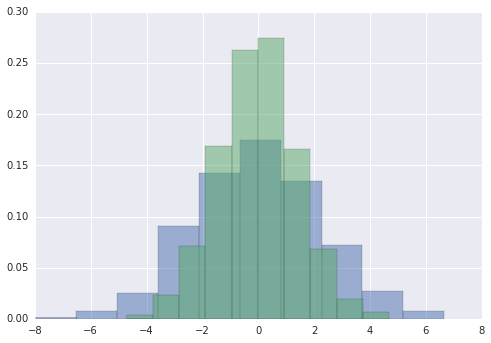

In [36]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation:

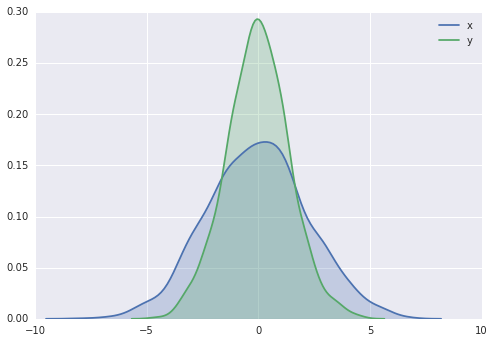

In [37]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using distplot:

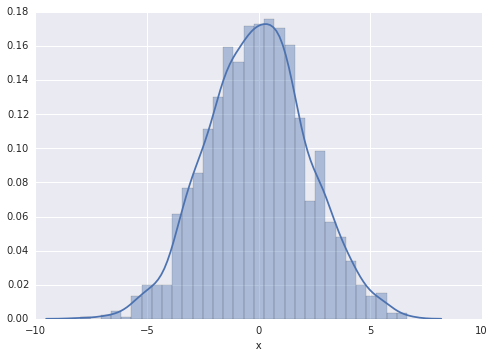

In [38]:
sns.distplot(data['x']);

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:

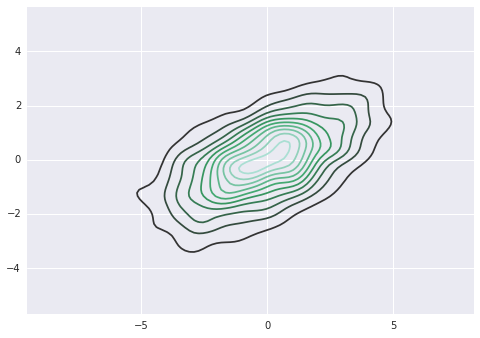

In [39]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we’ll set the style to a white background:

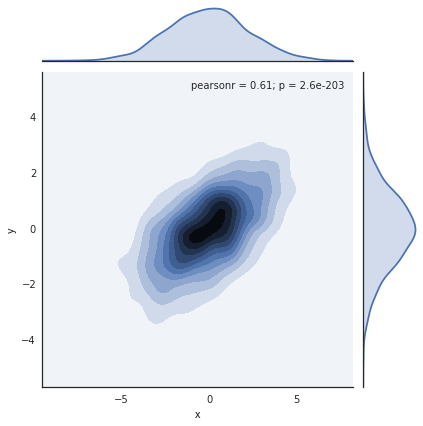

In [40]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters which can be passed to jointplot: for example, we can use a hexagonally-based histogram instead:

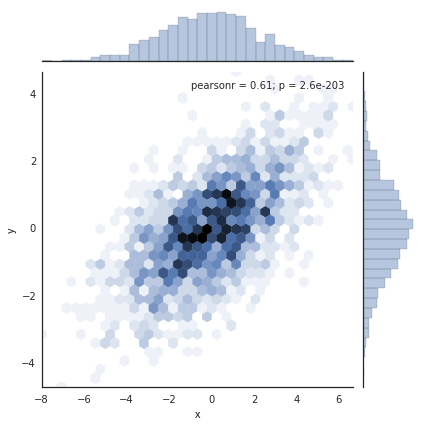

In [41]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pariplots

When you generalize joint plots to data sets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multi-dimensional data, when you’d like to plot all pairs of values against each other.

In [42]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multi-dimensional relationships among the samples is as easy as calling sns.pairplot:

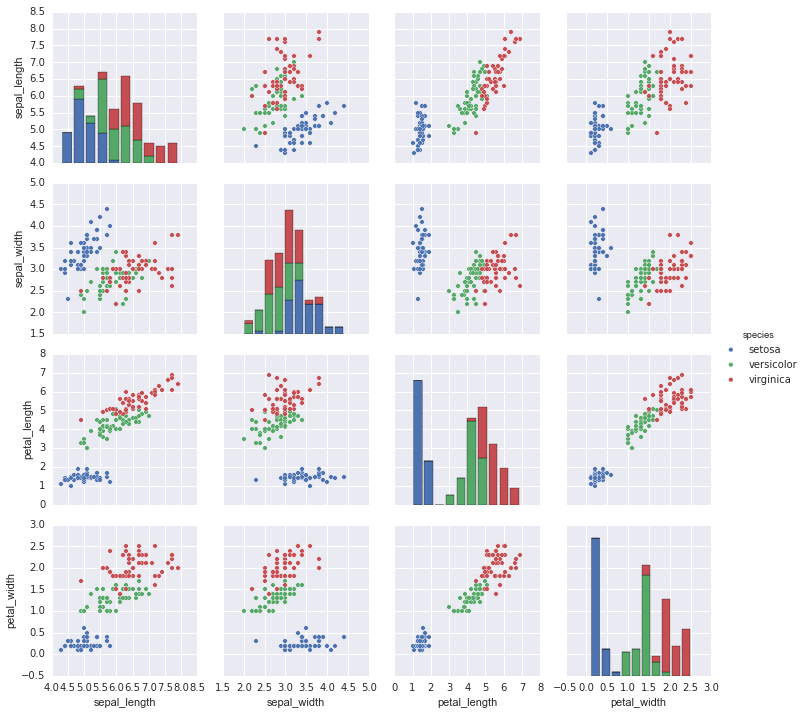

In [43]:
sns.pairplot(iris, hue='species', size=2.5);

###Faceted Histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn’s FacetGrid makes this extremely simple. We’ll take a look at some data which shows the amount that restaurant staff receive in tips based on various indicator data:

In [44]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


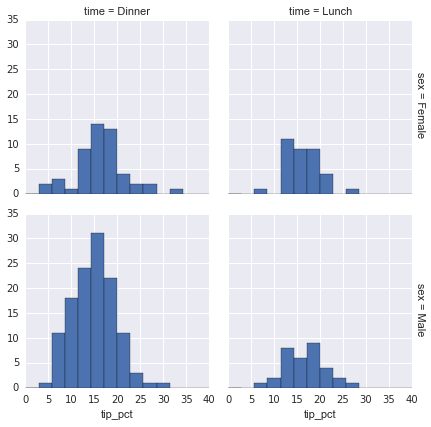

In [45]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

###Factor plots

Factor plots can be used to visualize this data as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

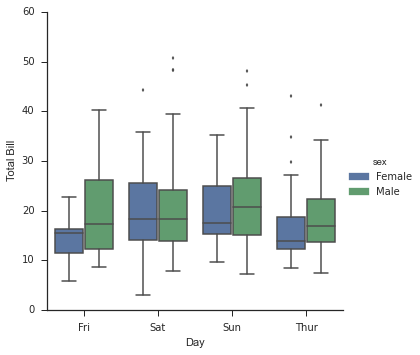

In [46]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

###Joint Distributions

Similar to the pairplot we saw above, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions:

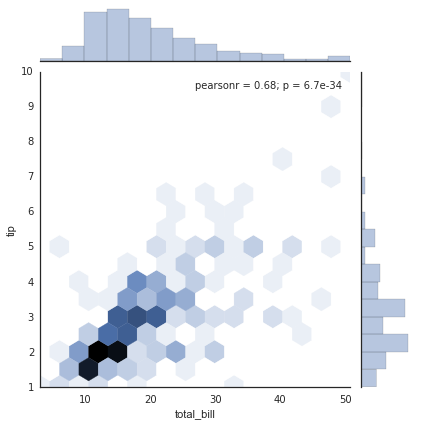

In [47]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

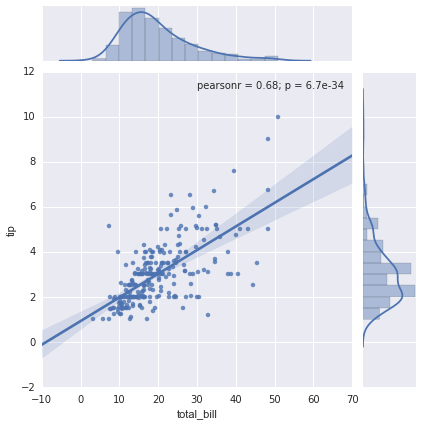

In [48]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

###Bar plots

Time series can be plotted using sns.factorplot:

In [49]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


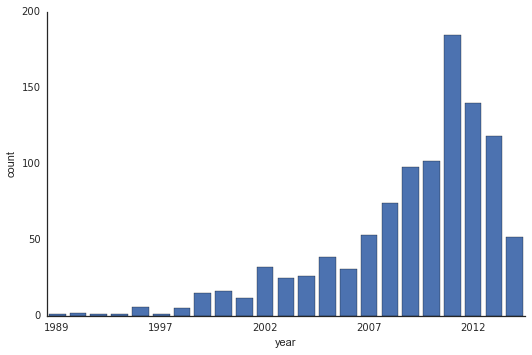

In [50]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=1.5)
    g.set_xticklabels(step=5)

We can learn more by looking at the method of discovery of each of these planets:

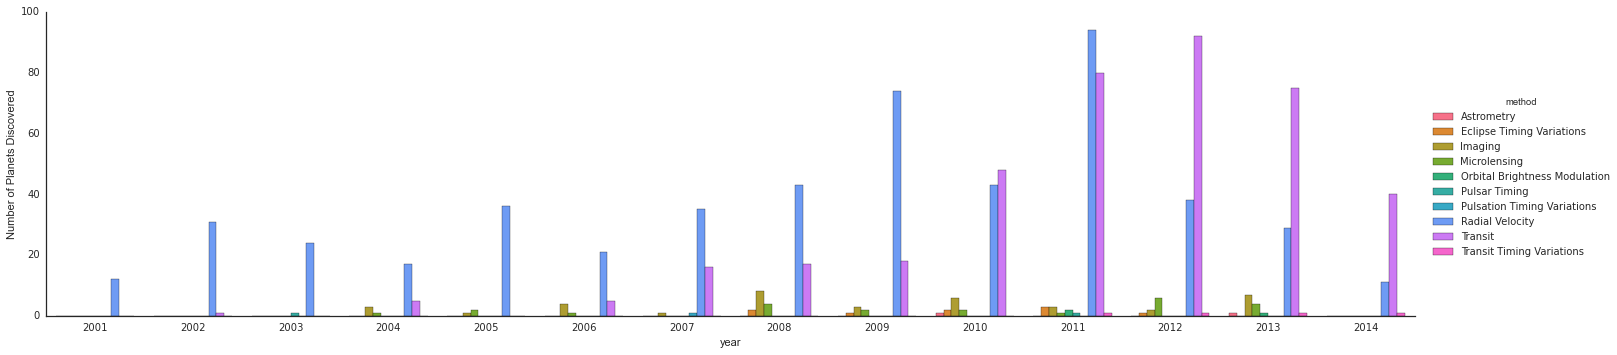

In [52]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0,
                       hue='method', x_order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## ggplot in Python

In [5]:
%matplotlib inline

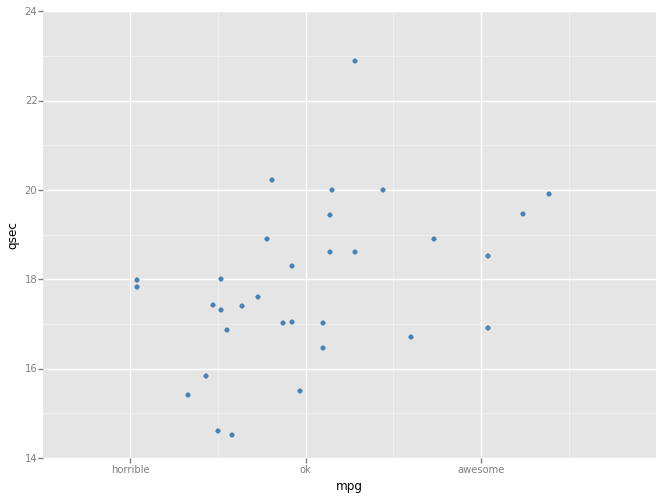

<ggplot: (278317549)>

In [6]:
from ggplot import *

ggplot(mtcars, aes('mpg', 'qsec')) + \
  geom_point(colour='steelblue') + \
  scale_x_continuous(breaks=[10,20,30],  \
                     labels=["horrible", "ok", "awesome"])

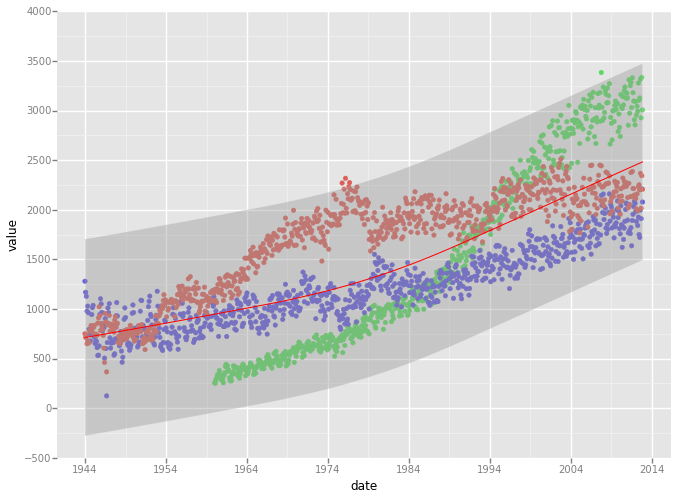

<ggplot: (277874929)>

In [11]:
meat_lng = pd.melt(meat[['date', 'beef', 'pork', 'broilers']], id_vars='date')
ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + \
    geom_point() + \
    stat_smooth(color='red')

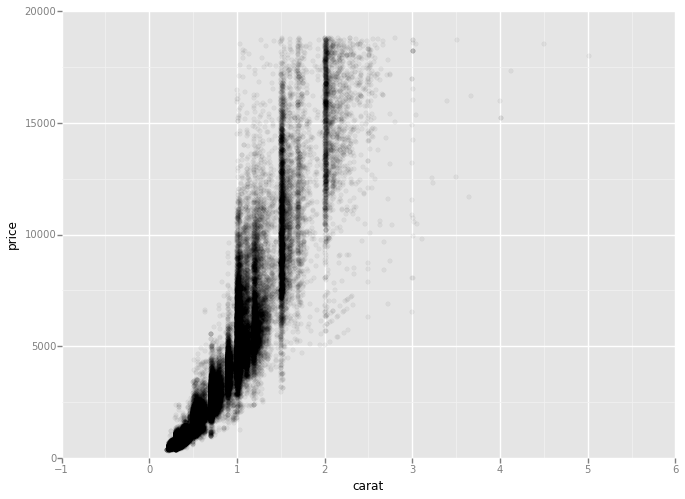

<ggplot: (277874733)>

In [12]:
ggplot(diamonds, aes('carat', 'price')) + \
    geom_point(alpha=1/20.) + \
    ylim(0, 20000)

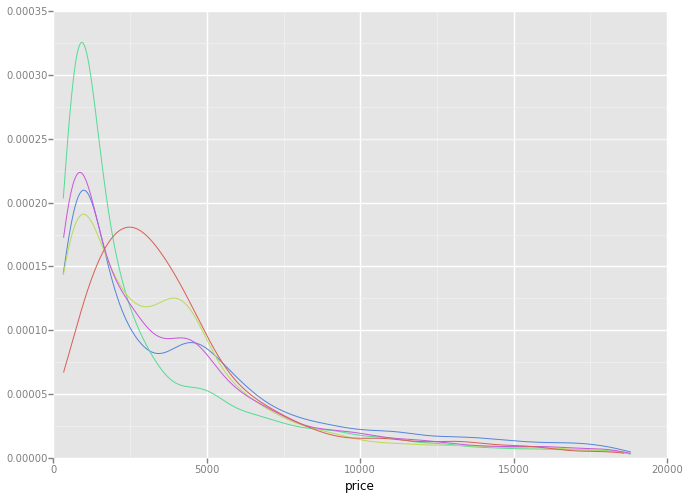

<ggplot: (281399969)>

In [15]:
ggplot(diamonds, aes(x='price', color='cut')) + \
    geom_density()

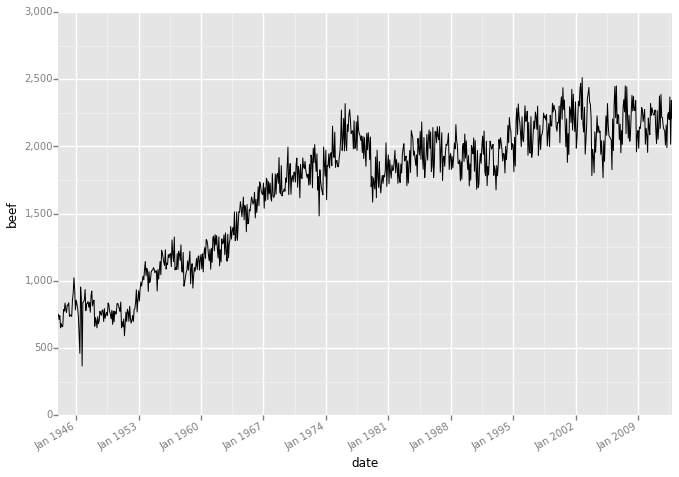

<ggplot: (290087493)>

In [27]:
ggplot(meat, aes('date','beef')) + \
    geom_line(color='black') + \
    scale_x_date(breaks=date_breaks('7 years'), labels='%b %Y') + \
    scale_y_continuous(labels='comma')

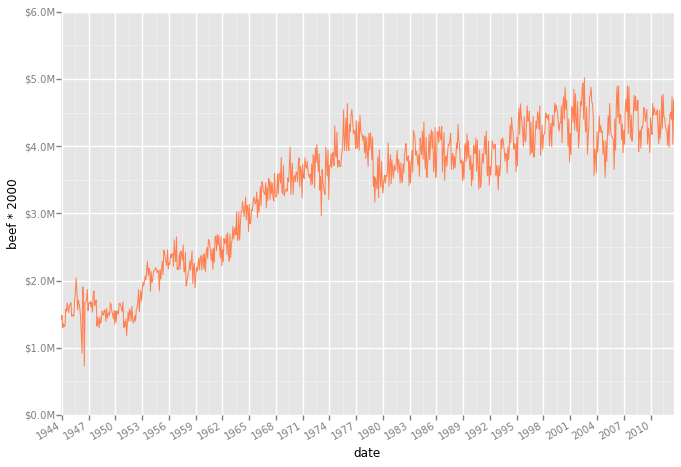

<ggplot: (281164809)>

In [28]:
ggplot(meat, aes('date','beef * 2000')) + \
    geom_line(color='coral') + \
    scale_x_date(breaks=date_breaks('36 months'), labels='%Y') + \
    scale_y_continuous(labels='millions')

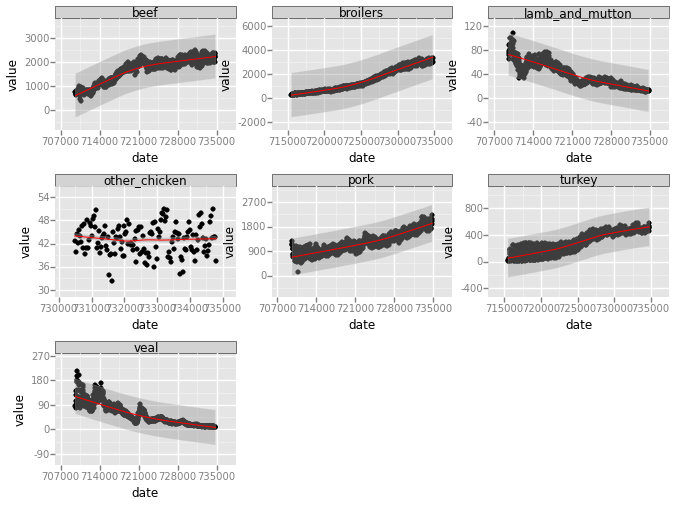

<ggplot: (283562269)>

In [32]:
meat_lng = pd.melt(meat, id_vars=['date'])

p = ggplot(aes(x='date', y='value'), data=meat_lng)
p + geom_point() + \
    stat_smooth(colour="red") + \
    facet_wrap("variable")

#p + geom_hist() + facet_wrap("color")

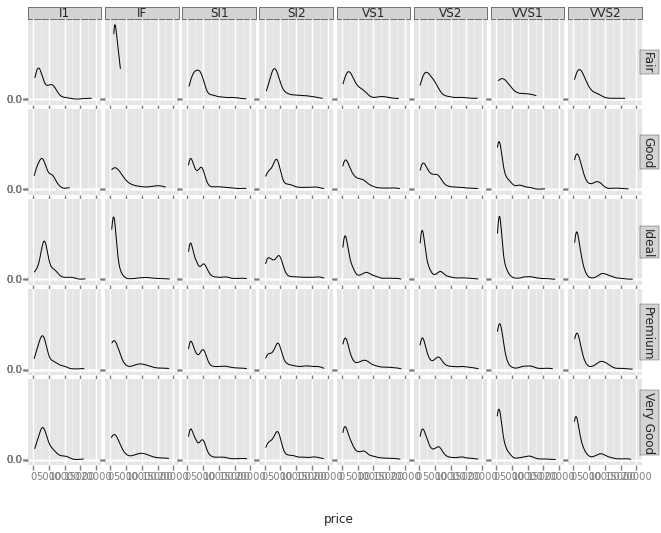

<ggplot: (294792445)>

In [54]:
p = ggplot(diamonds, aes(x='price'))
p + geom_density() + \
    facet_grid("cut", "clarity")

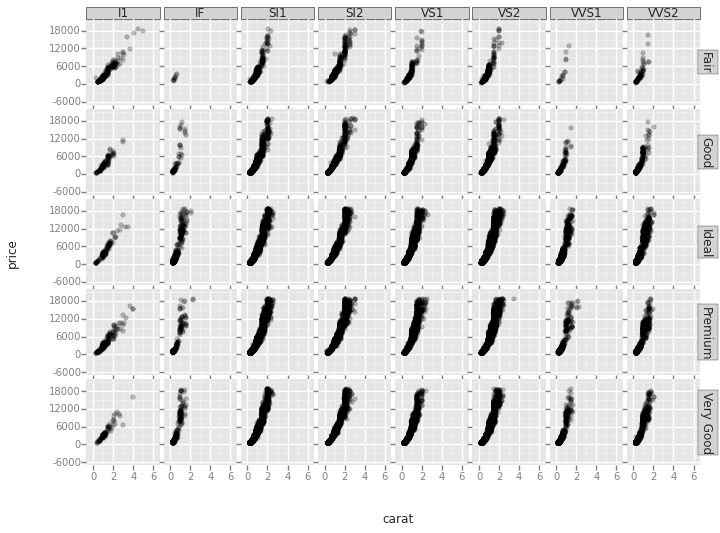

<ggplot: (298630525)>

In [55]:
p = ggplot(diamonds, aes(x='carat', y='price'))
p + geom_point(alpha=0.25) + \
    facet_grid("cut", "clarity")

## D3 in IPython

In [15]:
html_src = """
                <h2>Simple D3 plot</h2>
                <div id="chart"></div>
           """

test_d3_js = """
                    var width = 600;
                    var height = 100;
                    var root = d3.select('#chart').append('svg')
                        .attr({
                          'width': width,
                          'height': height,
                        })
                        .style('border', '1px solid black');
                     
                    var evenNumbers = [0, 2, 4, 6, 8, 10];
                    var maxDataValue = d3.max(evenNumbers);
                    var barHeight = height / evenNumbers.length;
                    var barWidth = function(datum) {
                      return datum * (width / maxDataValue);
                    };
                    var barX = 0;
                    var barY = function(datum, index) {
                      return index * barHeight;
                    };
                    root.selectAll('rect.number')
                        .data(evenNumbers).enter()
                      .append('rect')
                        .attr({
                          'class': 'number',
                          'x': barX,
                          'y': barY,
                          'width': barWidth,
                          'height': barHeight,
                          'fill': '#A6D854',
                          'stroke': '#444',
                     });    
             """

js_libs = ['http://rawgithub.com/mbostock/d3/master/d3.min.js']

In [16]:
import IPython
from IPython.core.display import display_html, display_javascript, Javascript
display_html(IPython.core.display.HTML(data=html_src))
display_javascript( Javascript(data=test_d3_js, lib= js_libs) )

Simple D3 plot

##Bokeh

In [4]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

The basic steps to creating plots with the bokeh.plotting interface are:

- Prepare some data (in this case plain python lists).
- Tell Bokeh where to generate output (in this case using output_file(), with "lines.html" as the filename to save as).
- Call figure() to create a plot with some overall options like title, tools and axes labels.
- Add renderers (in this case, Figure.line) for our data, with visual customizations like colors, legends and widths to the plot.
- Ask Bokeh to show() or save() the results.

In [13]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [val**2 for val in x]
y1 = [10**val for val in x]
y2 = [10**(val**2) for val in x]

# output to static HTML file
output_file("log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

In [14]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

# output to static HTML file (with CDN resources)
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [15]:
import numpy as np
from bokeh.plotting import *

# prepare some date
N = 100
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# NEW: create a new plot and share both ranges
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# NEW: create a new plot and share only one range
s3 = figure(width=250, height=250, x_range=s1.x_range, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)